Alberto Geroldi 968236

# <span style="color:green">Numerical simulation laboratory (NSL)</span>

# Exercise 7

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants

In [69]:
def error(AV,AV2,n):
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

In [70]:
def blocks(data_file):
    sum1 = 0.
    sum2 = 0.
    y_val = np.zeros((len(data_file), 2))
    for ix in range(len(data_file)):
        sum1 += data_file[ix]
        sum2 += data_file[ix] * data_file[ix]
        AV = sum1 / (ix + 1)
        AV2 = sum2 / (ix + 1)
        y_val[ix,0] = AV
        y_val[ix,1] = error(AV,AV2,ix)
    return y_val

In [71]:
def autocorrelation(x, steps):
    autoc = np.zeros(steps)
    var = np.var(x) 
    for i in range(steps):
        ac = (np.sum(x[:len(x)-i]*x[i:]) - np.sum(x[:len(x)-i])*np.sum(x[i:]) / (len(x) - i)) / (len(x) - i)
        autoc[i] = ac / var
    return autoc   

In [72]:
def estimation_block_err(l_min, l_max, l_step, nblocks, blocks, phase_file, n_steps):
    err = np.zeros(nblocks)
    for size in range(l_min, l_max, l_step):
        last_int_div = (n_steps//size)*size
        values = np.mean(phase_file[:last_int_div].reshape(-1, size), axis = 1)
        err[size//l_step -1] = blocks(values)[-1,-1]
    return err

## EX 7.2

- After we have produced instantaneous values of potential energy per particle $U/N$ ($M=5\times 10^5$ Monte-carlo steps) for the three phases 
  (solid, liquid, gas) we now compute the autocorrelation functions of $U/N$ to estimate how large the blocks in our simulation should be.  
  
- We estimate the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times     10^3$, being $N$ the number of blocks.



**Equilibration** and Potential Energy **istantaneous values**

In [6]:
n_equilibration = 5000
n_steps_ist_pot = 500000

solid_pot_e = np.loadtxt("equilibration/phase/solid_phase.txt")
liquid_pot_e = np.loadtxt("equilibration/phase/liquid_phase.txt")
gas_pot_e = np.loadtxt("equilibration/phase/gas_phase.txt")

ist_solid_pot_e = np.loadtxt("data/phase/solid_istant_pot_energy.txt")
ist_liquid_pot_e = np.loadtxt("data/phase/liquid_istant_pot_energy.txt")
ist_gas_pot_e = np.loadtxt("data/phase/gas_istant_pot_energy.txt")

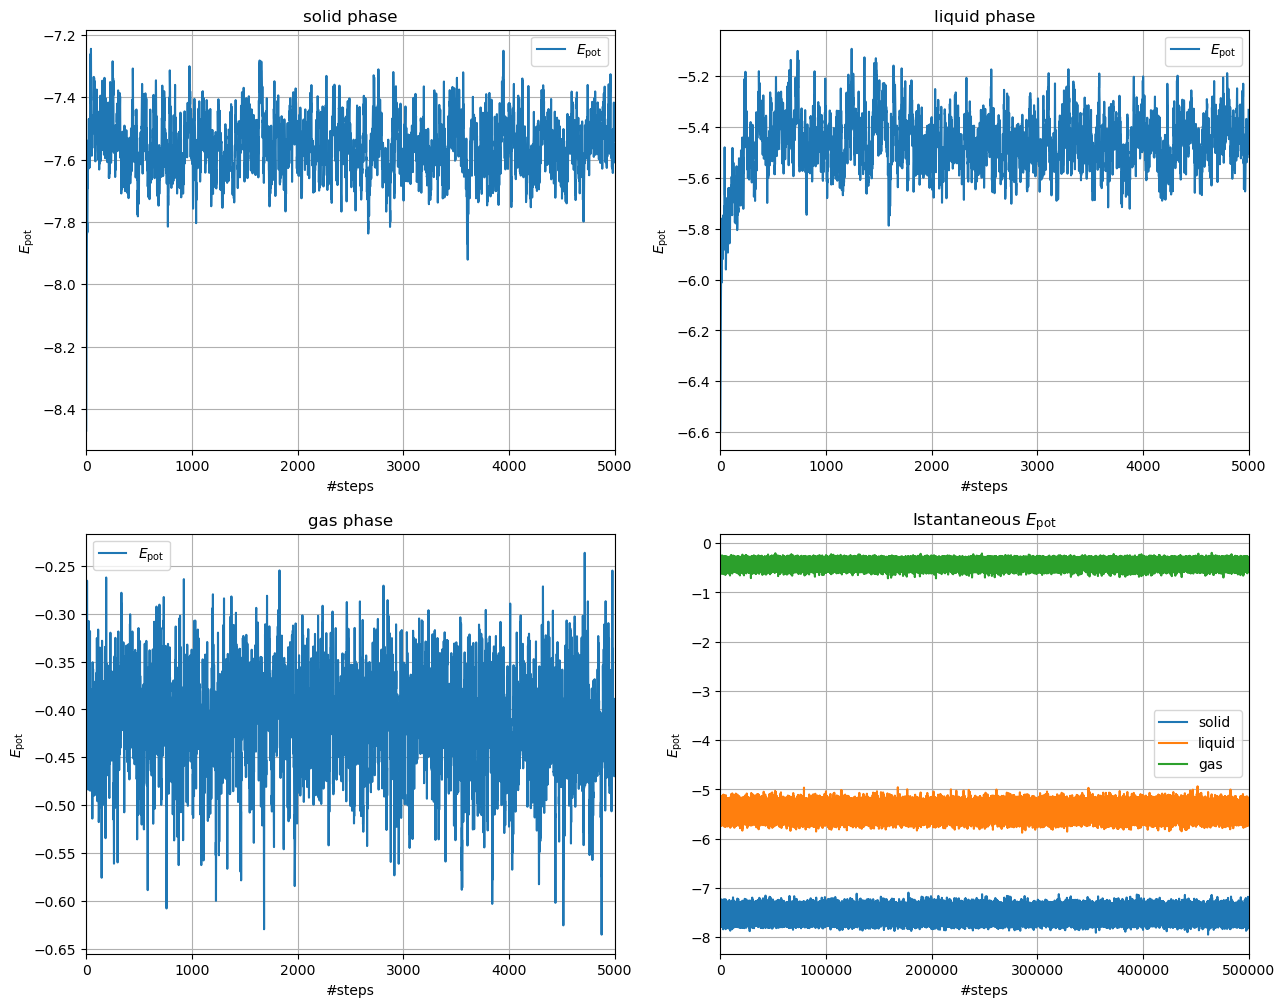

In [14]:
x = np.arange(n_equilibration)
x_ist = np.arange(n_steps_ist_pot);

fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(221)

ax1.plot(x, solid_pot_e, label="$E_\mathrm{pot}$")
ax1.set(xlabel="#steps", ylabel="$E_\mathrm{pot}$")
ax1.set_xlim(0, n_equilibration)
ax1.set_title('solid phase')
ax1.legend(loc='best')
ax1.grid(True)

ax2 = fig.add_subplot(222)

ax2.plot(x, liquid_pot_e, label="$E_\mathrm{pot}$")
ax2.set(xlabel="#steps", ylabel="$E_\mathrm{pot}$")
ax2.set_xlim(0, n_equilibration)
ax2.set_title('liquid phase')
ax2.legend(loc='best')
ax2.grid(True)

ax3 = fig.add_subplot(223)

ax3.plot(x, gas_pot_e, label="$E_\mathrm{pot}$")
ax3.set(xlabel="#steps", ylabel="$E_\mathrm{pot}$")
ax3.set_xlim(0, n_equilibration)
ax3.set_title('gas phase')
ax3.legend(loc='best')
ax3.grid(True)

ax4 = fig.add_subplot(224)

ax4.plot(x_ist, ist_solid_pot_e, label="solid")
ax4.plot(x_ist, ist_liquid_pot_e, label="liquid")
ax4.plot(x_ist, ist_gas_pot_e, label="gas")
ax4.set(xlabel="#steps", ylabel="$E_\mathrm{pot}$")
ax4.set_xlim(0, n_steps_ist_pot)
ax4.set_title("Istantaneous $E_\mathrm{pot}$")
ax4.legend(loc='best')
ax4.grid(True)

plt.show()


### 7.2.1 Autocorrelation potential energy (solid, liquid, gas)

In [7]:
autoc_solid = autocorrelation(ist_solid_pot_e, 500)
autoc_liquid = autocorrelation(ist_liquid_pot_e, 500)
autoc_gas = autocorrelation(ist_gas_pot_e, 500)

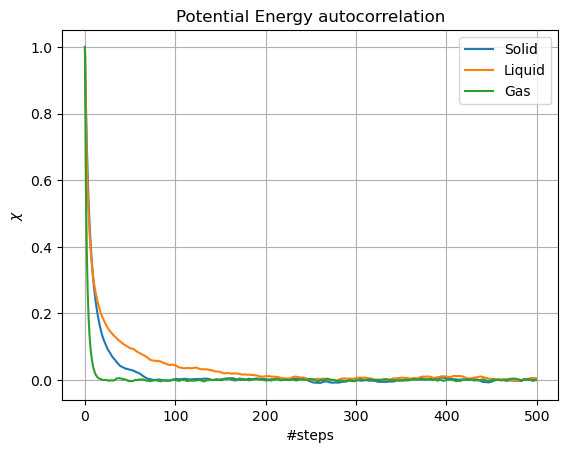

In [30]:
plt.title("Potential Energy autocorrelation")
plt.plot(autoc_solid, label='Solid')
plt.plot(autoc_liquid, label='Liquid')
plt.plot(autoc_gas, label='Gas')
plt.xlabel("#steps")
plt.ylabel("$\chi$")
plt.legend(loc='best')
plt.grid(True)
plt.show()

We can see that all the three phases uncorrelate approximately after 200 - 250 steps of the MC simulation

### 7.2.2 Estimation of the statistical uncertainties of the expectation value of Potential Energy for different size of the blocks

Size of the blocks (L = M/N) from 10 to 5000  
- M = MC steps
- N = number of blocks

In [8]:
solid_pot_err = estimation_block_err(10, 5010, 10, 500, blocks, ist_solid_pot_e, n_steps_ist_pot)
liquid_pot_err = estimation_block_err(10, 5010, 10, 500, blocks, ist_liquid_pot_e, n_steps_ist_pot)
gas_pot_err = estimation_block_err(10, 5010, 10, 500, blocks, ist_gas_pot_e, n_steps_ist_pot)

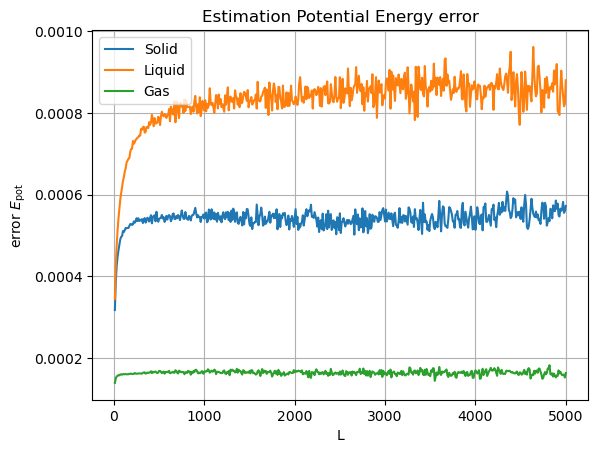

In [34]:
x_size = range(10, 5010, 10)

plt.title("Estimation Potential Energy error")
plt.plot(x_size, solid_pot_err, label='Solid')
plt.plot(x_size, liquid_pot_err, label='Liquid')
plt.plot(x_size, gas_pot_err, label='Gas')
plt.xlabel("L")
plt.ylabel("error $E_\mathrm{pot}$")
plt.legend(loc='best')
plt.grid(True)
plt.show()

We see that if the block size is large enough (from the graphic seems to be between 500 and 1000 steps per block) the error reach a stable value with
some fluctuasions. Investigating on **autocorrelation function** and on Potential energy error as function of the size of the blocks, the right choice 
of the number of steps per block seems to be a value near **1000 steps**. Over this value, an increase of number of steps has the only drawback to slowdown simulation
without increase accuracy.

## EX 7.3

We compute the radial distribution function $g(r)$ as a function of the radial distance $r$ after equilibration time.  
Now we show only an example for solid phase to see if our function is correct.

In [73]:
sigma_a = 0.34e-9

In [63]:
x, y, err_g = np.loadtxt("data/ex7_3/solid_output_gdir_final.dat", usecols=(0,1,2), unpack='true')

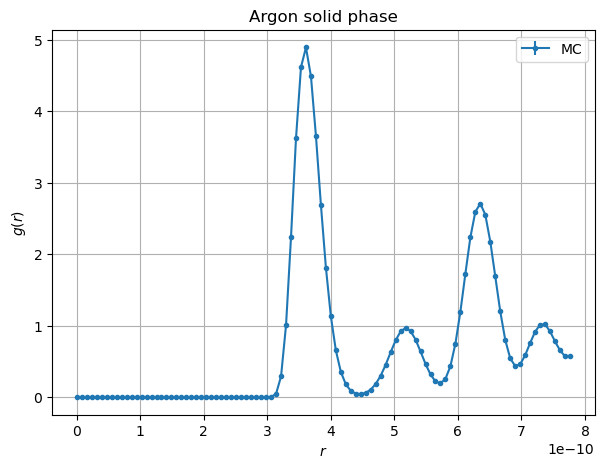

In [64]:
x = x*sigma_a
plt.figure(figsize=(7,5))
plt.errorbar(x,y,yerr=err_g, marker=".", label="MC")

plt.title("Argon solid phase")
plt.xlabel("$r$")
plt.ylabel("$g(r)$")
plt.grid(True)
plt.legend(loc='best')
plt.show()

## EX 7.4

- After equilibration, we show average values and uncertainties for the potential energy per particle, $U/N$ and the pressure $P$.

- After equilibration, we compute the radial distribution function $g(r)$ as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$
  and we compare **Monte-Carlo results** with **Molecular Dynamics results** in similar thermodynamic conditions. We show average values and uncertainties.
  
All the values are in SI units.

In [78]:
s_delta = 0.12
l_delta = 0.2
g_delta = 7.5

#SI units conversion
sigma_a = 0.34e-9
mass_a = 39.948 * scipy.constants.physical_constants["atomic mass constant"][0]
energy_a = 120 * scipy.constants.k

### 7.4.1

In [79]:
sx1, sy1, serr1 = np.loadtxt("data/phase/solid_output_epot.dat", usecols=(0,2,3), unpack='true')
sx2, sy2, serr2 = np.loadtxt("data/phase/solid_output_press.dat", usecols=(0,2,3), unpack='true')
lx1, ly1, lerr1 = np.loadtxt("data/phase/liquid_output_epot.dat", usecols=(0,2,3), unpack='true')
lx2, ly2, lerr2 = np.loadtxt("data/phase/liquid_output_press.dat", usecols=(0,2,3), unpack='true')
gx1, gy1, gerr1 = np.loadtxt("data/phase/gas_output_epot.dat", usecols=(0,2,3), unpack='true')
gx2, gy2, gerr2 = np.loadtxt("data/phase/gas_output_press.dat", usecols=(0,2,3), unpack='true')

**ARGON** $U/N$ and $P$ for solid, liquid and gas phases in MC simulation 

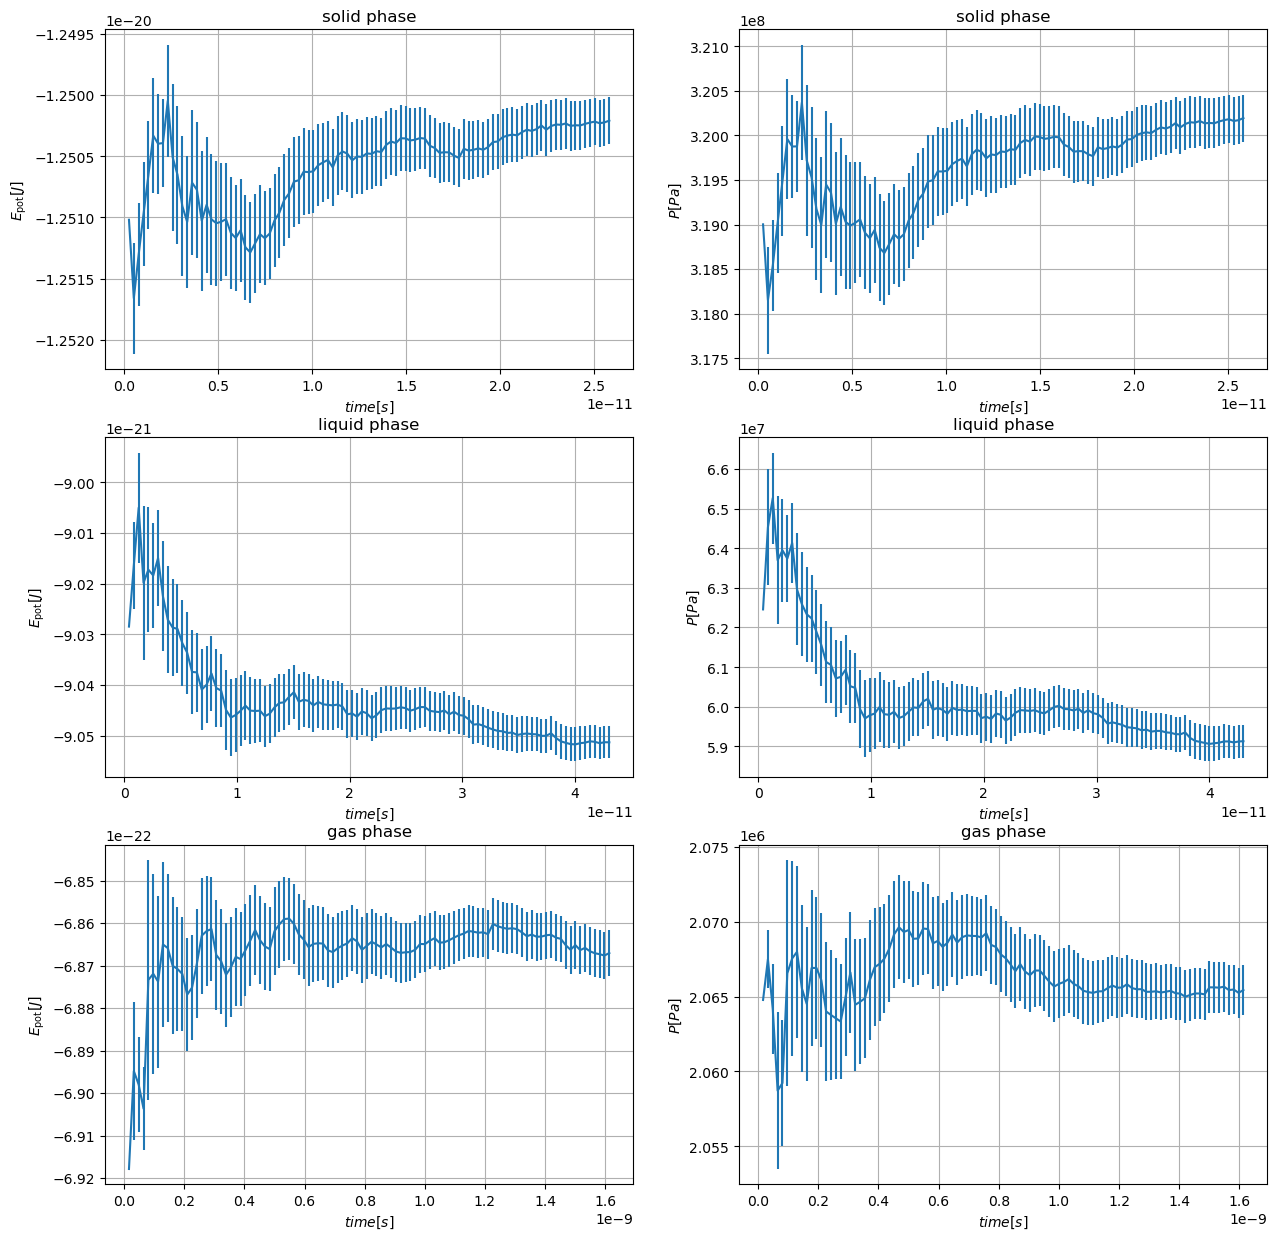

In [80]:
fig = plt.figure(figsize=(15, 15))

sx1 = sx1*np.sqrt(mass_a*sigma_a*sigma_a/energy_a)*s_delta
sy1 = sy1*energy_a
serr1 = serr1*energy_a
ax1 = fig.add_subplot(321)
ax1.errorbar(sx1, sy1, yerr=serr1)
ax1.set(xlabel="$time[s]$", ylabel="$E_\mathrm{pot}[J]$")
ax1.set_title('solid phase')
ax1.grid(True)

sx2 = sx2*np.sqrt(mass_a*sigma_a*sigma_a/energy_a)*s_delta
sy2 = sy2*energy_a/(sigma_a*sigma_a*sigma_a)
serr2 = serr2*energy_a/(sigma_a*sigma_a*sigma_a)
ax2 = fig.add_subplot(322)
ax2.errorbar(sx2, sy2, yerr=serr2)
ax2.set(xlabel="$time[s]$", ylabel="$P[Pa]$")
ax2.set_title('solid phase')
ax2.grid(True)

lx1 = lx1*np.sqrt(mass_a*sigma_a*sigma_a/energy_a)*l_delta
ly1 = ly1*energy_a
lerr1 = lerr1*energy_a
ax3 = fig.add_subplot(323)
ax3.errorbar(lx1, ly1, yerr=lerr1)
ax3.set(xlabel="$time[s]$", ylabel="$E_\mathrm{pot}[J]$")
ax3.set_title('liquid phase')
ax3.grid(True)

lx2 = lx2*np.sqrt(mass_a*sigma_a*sigma_a/energy_a)*l_delta
ly2 = ly2*energy_a/(sigma_a*sigma_a*sigma_a)
lerr2 = lerr2*energy_a/(sigma_a*sigma_a*sigma_a)
ax4 = fig.add_subplot(324)
ax4.errorbar(lx2, ly2, yerr=lerr2)
ax4.set(xlabel="$time[s]$", ylabel="$P[Pa]$")
ax4.set_title('liquid phase')
ax4.grid(True)

gx1 = gx1*np.sqrt(mass_a*sigma_a*sigma_a/energy_a)*g_delta
gy1 = gy1*energy_a
gerr1 = gerr1*energy_a
ax5 = fig.add_subplot(325)
ax5.errorbar(gx1, gy1, yerr=gerr1)
ax5.set(xlabel="$time[s]$", ylabel="$E_\mathrm{pot}[J]$")
ax5.set_title('gas phase')
ax5.grid(True)

gx2 = gx2*np.sqrt(mass_a*sigma_a*sigma_a/energy_a)*g_delta
gy2 = gy2*energy_a/(sigma_a*sigma_a*sigma_a)
gerr2 = gerr2*energy_a/(sigma_a*sigma_a*sigma_a)
ax6 = fig.add_subplot(326)
ax6.errorbar(gx2, gy2, yerr=gerr2)
ax6.set(xlabel="$time[s]$", ylabel="$P[Pa]$")
ax6.set_title('gas phase')
ax6.grid(True)

plt.show()


### 7.4.2

Radial distribution function $g(r)$ for MD and MC simulations.

In [66]:
sgx1, sgy1, serr_g1 = np.loadtxt("data/g/solid_md_output_gdir_final.dat", usecols=(0,1,2), unpack='true')
sgx2, sgy2, serr_g2 = np.loadtxt("data/g/solid_mc_output_gdir_final.dat", usecols=(0,1,2), unpack='true')
lgx1, lgy1, lerr_g1 = np.loadtxt("data/g/liquid_md_output_gdir_final.dat", usecols=(0,1,2), unpack='true')
lgx2, lgy2, lerr_g2 = np.loadtxt("data/g/liquid_mc_output_gdir_final.dat", usecols=(0,1,2), unpack='true')
ggx1, ggy1, gerr_g1 = np.loadtxt("data/g/gas_md_output_gdir_final.dat", usecols=(0,1,2), unpack='true')
ggx2, ggy2, gerr_g2 = np.loadtxt("data/g/gas_mc_output_gdir_final.dat", usecols=(0,1,2), unpack='true')

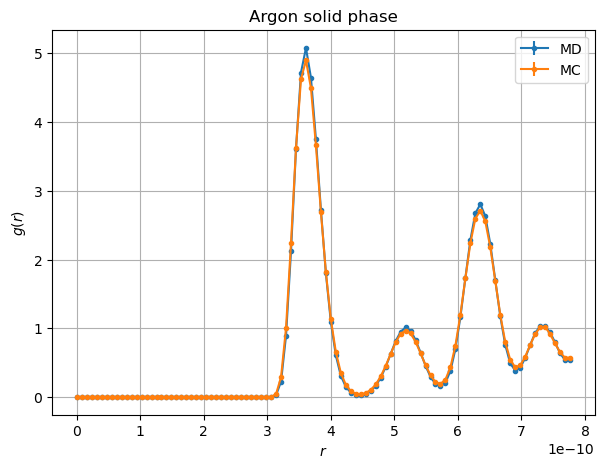

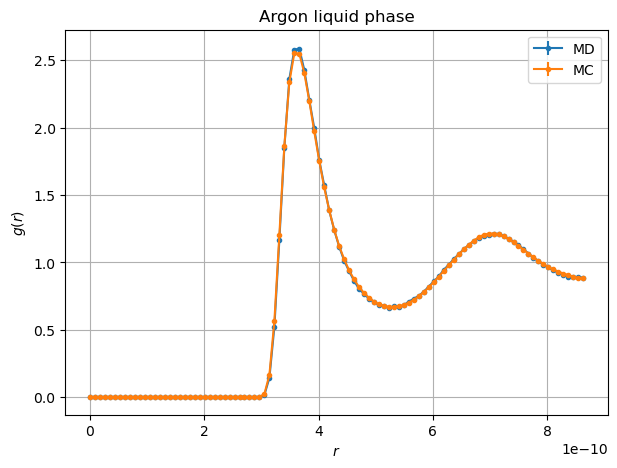

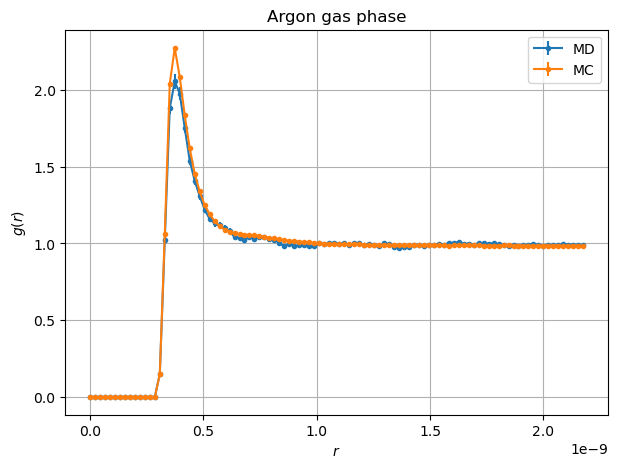

In [67]:
sgx1 = sgx1*sigma_a
sgx2 = sgx2*sigma_a
plt.figure(figsize=(7,5))
plt.errorbar(sgx1,sgy1,yerr=serr_g1, marker=".", label="MD")
plt.errorbar(sgx2,sgy2,yerr=serr_g2, marker=".", label="MC")
plt.title("Argon solid phase")
plt.xlabel("$r$")
plt.ylabel("$g(r)$")
plt.grid(True)
plt.legend(loc='best')
plt.show()

lgx1 = lgx1*sigma_a
lgx2 = lgx2*sigma_a
plt.figure(figsize=(7,5))
plt.errorbar(lgx1,lgy1,yerr=lerr_g1, marker=".", label="MD")
plt.errorbar(lgx2,lgy2,yerr=lerr_g2, marker=".", label="MC")
plt.title("Argon liquid phase")
plt.xlabel("$r$")
plt.ylabel("$g(r)$")
plt.grid(True)
plt.legend(loc='best')
plt.show()

ggx1 = ggx1*sigma_a
ggx2 = ggx2*sigma_a
plt.figure(figsize=(7,5))
plt.errorbar(ggx1,ggy1,yerr=gerr_g1, marker=".", label="MD")
plt.errorbar(ggx2,ggy2,yerr=gerr_g2, marker=".", label="MC")
plt.title("Argon gas phase")
plt.xlabel("$r$")
plt.ylabel("$g(r)$")
plt.grid(True)
plt.legend(loc='best')
plt.show()